## Campaña de Marketing Bancario ##

In [59]:
import json
import pandas as pd

url = "https://storage.googleapis.com/breathecode/project-files/bank-marketing-campaign-data.csv"
df = pd.read_csv(url, sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [60]:
# Obtener las dimensiones
df.shape

(41188, 21)

In [61]:
df.columns
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  str    
 2   marital         41188 non-null  str    
 3   education       41188 non-null  str    
 4   default         41188 non-null  str    
 5   housing         41188 non-null  str    
 6   loan            41188 non-null  str    
 7   contact         41188 non-null  str    
 8   month           41188 non-null  str    
 9   day_of_week     41188 non-null  str    
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  str    
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null  float64
 1

In [62]:
##Vamos a conservar algunos datos relevante para enfocarse en los datos que se desean procesar##

cols_to_drop = [
    'duration', 
    'month', 
    'contact', 
    'day_of_week', 
    'pdays', 
    'previous', 
    'poutcome'
]

df = df.drop(columns=cols_to_drop)

In [63]:
df.shape

(41188, 14)

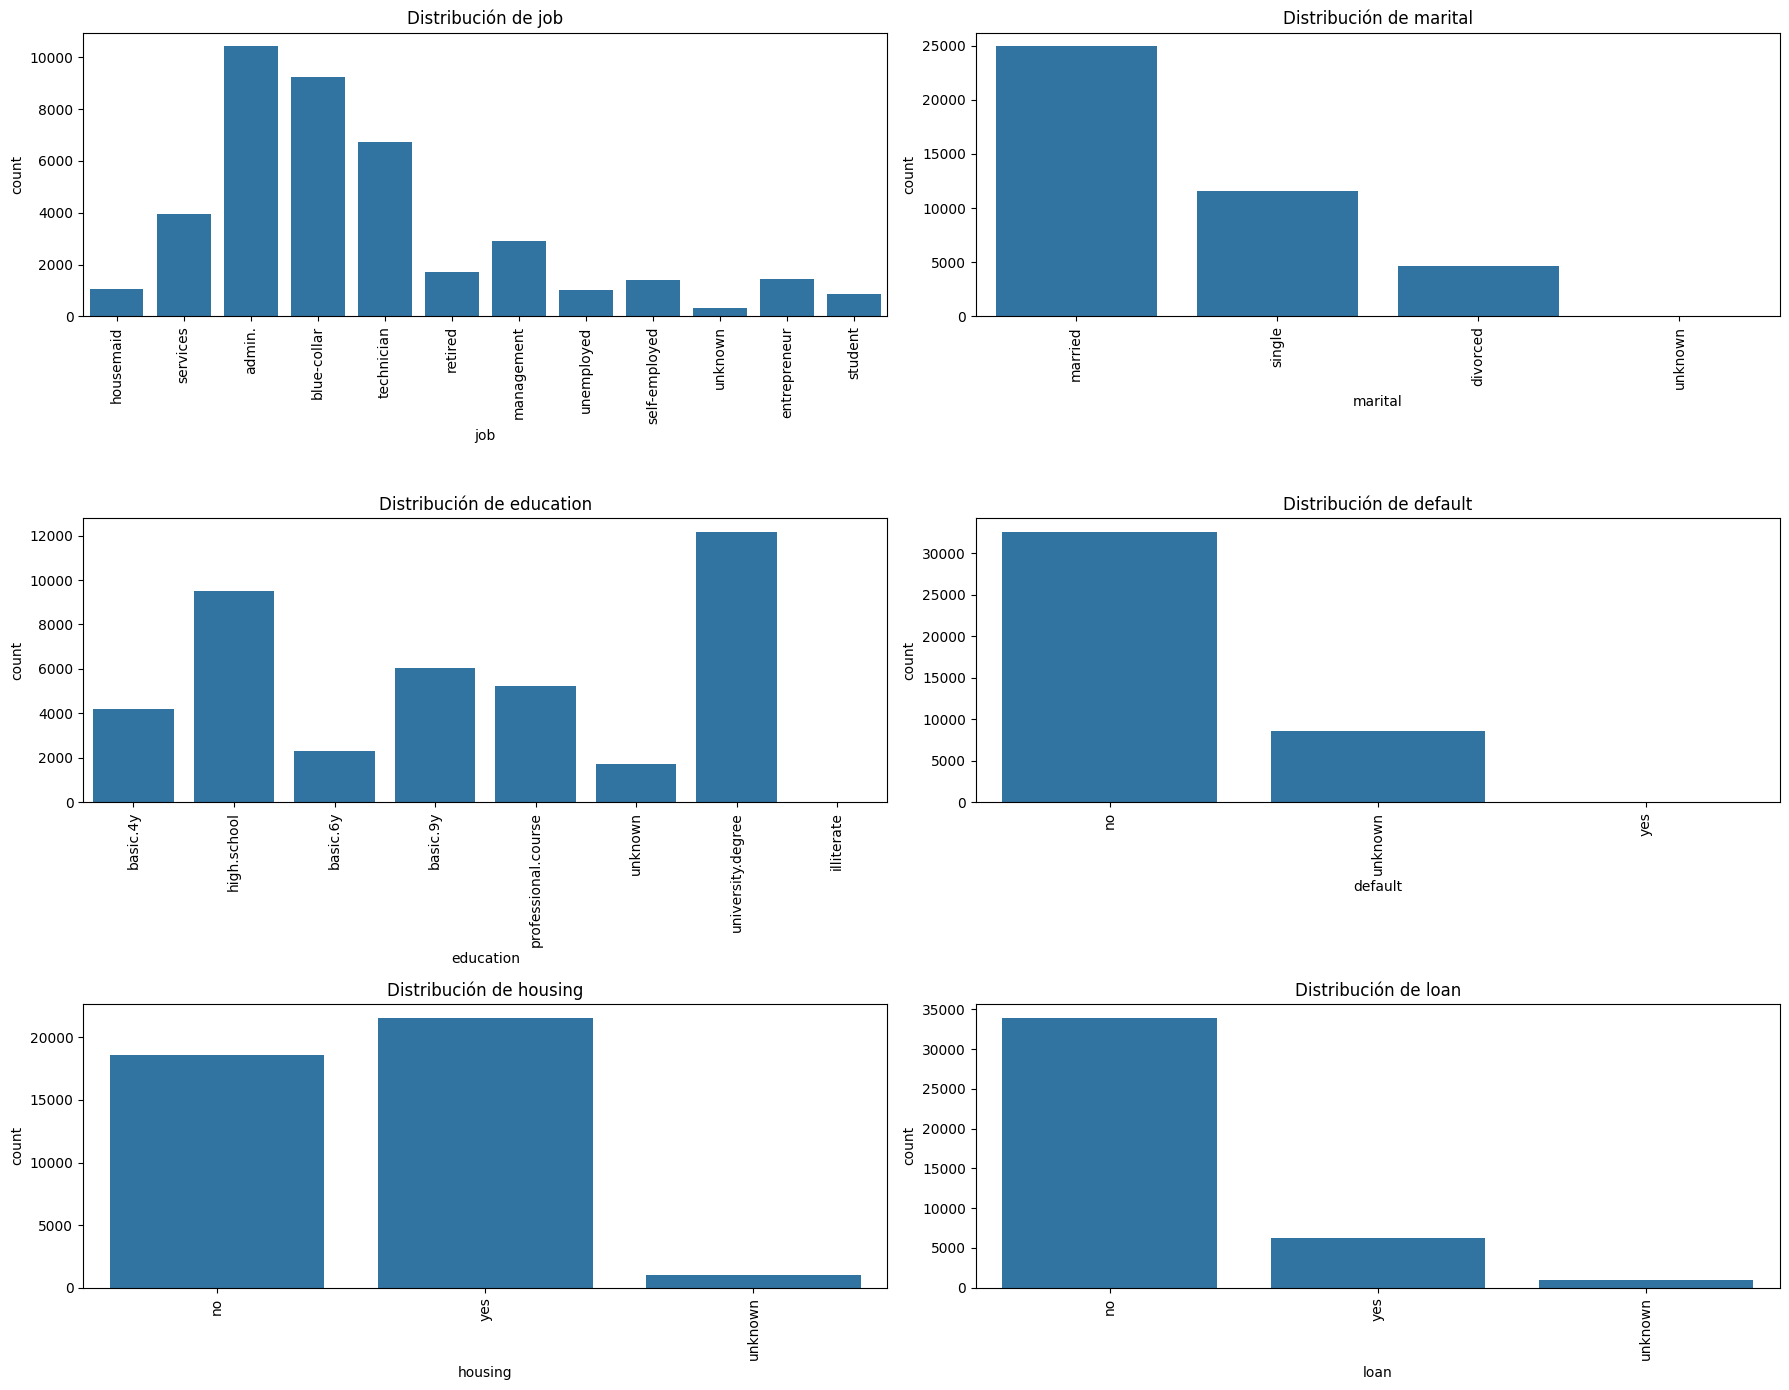

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

categoricas = [
    "job", "marital", "education",
    "default", "housing", "loan"
]

plt.figure(figsize=(18, 14))

for i, col in enumerate(categoricas, 1):
    plt.subplot(3, 2, i)
    sns.countplot(data=df, x=col)
    plt.title(f"Distribución de {col}")
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


INTERPRETACIÓN:
La distribución del tipo de trabajo y el nivel de estudios, refieren directamente a lo que percibirían los clientes según su perfil socioeconómico.
Existe en menor proporción clientes con impagos por lo que se encontrarían con menos probabilidad de acceder a la campaña.
En mayor proporción se encuentran los clientes que cuenta con hipoteca, pero también los clientes están casados por lo que suelen destinar una parte de sus ingresos al ahorro mancomunados.
La mayoría no cuenta con préstamos por lo que podrían ser aquellos que les interese o tengan un monto destinado para su ahorro.


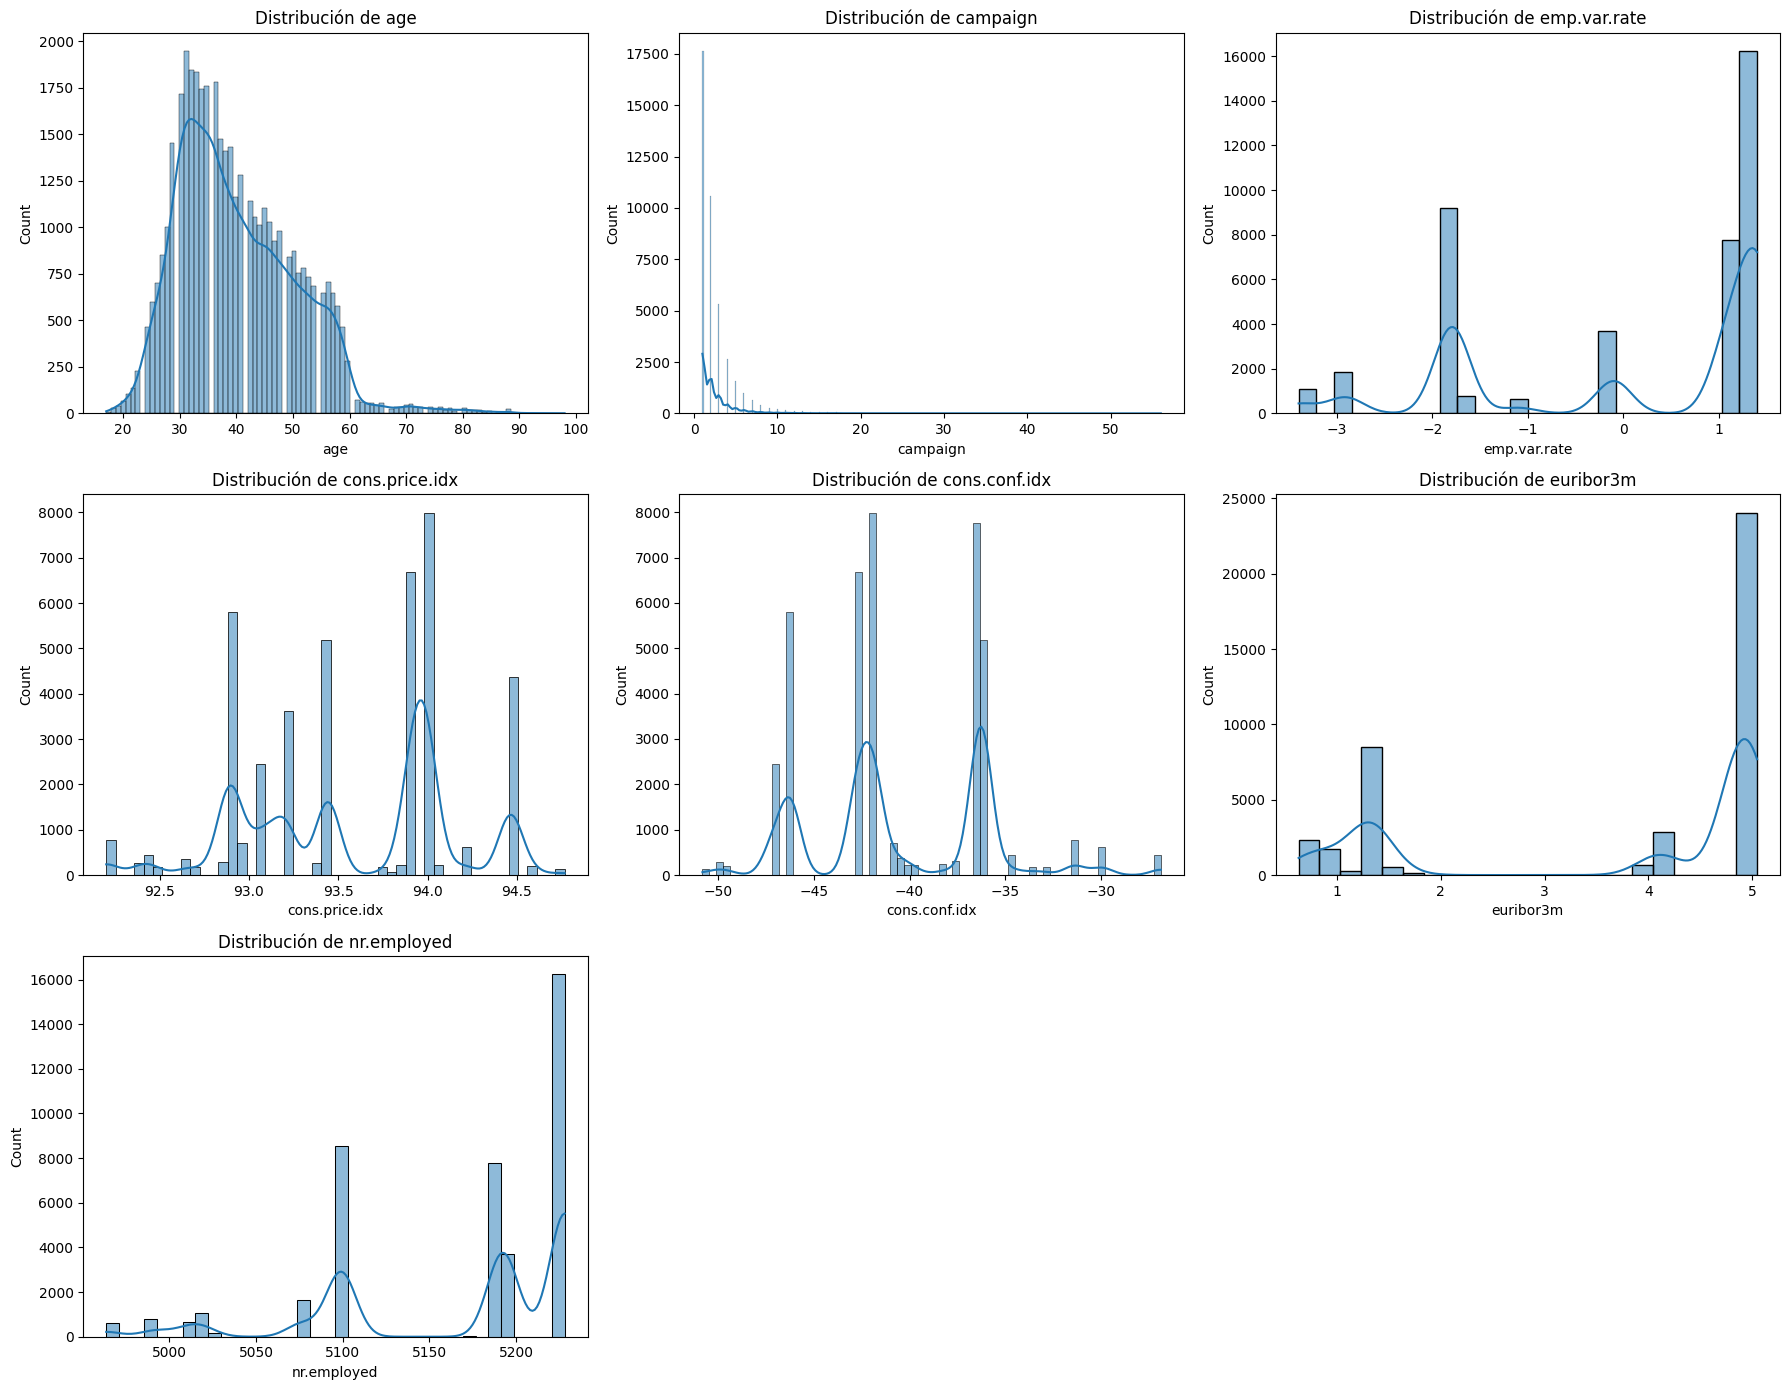

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

numericas = [
    "age", "campaign", "emp.var.rate", "cons.price.idx",
    "cons.conf.idx", "euribor3m", "nr.employed"
]

plt.figure(figsize=(18, 14))

for i, col in enumerate(numericas, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribución de {col}")

plt.tight_layout()
plt.show()



INTERPRETACIÓN:

1. Distribución de edades: La mayoría se concentra en la edad de crecimiento a los 30's y va disminuyendo hasta los 50 donde decrece.
2. Distribución de contactados: Un número alto de contactos suele asociarse con un “no”, la cola es larga es decir, muchos de los clientes fueron       contactados en más de 3 ocasiones
3. Distribución de Tasa de variación del empleo: Este indicador es medido por el mercado, por lo que los clientes que tienen en cartera siguen teniendo el mismo valor dependiendo del mercado. El banco está llamando a clientes en distintos momentos económicos, y esos momentos afectan su disposición a contratar un depósito.
4.Distribución en el Índice de Precios del Consumidor: Lo que refleja la inflación del mercado y está directamente relacionado con el poder de ahorro de los clientes. En este caso la distribución es muy estrecha lo que refleja estabilidad de precios favorece la captación de depósitos.
5. Distribución del Índice de Confianza del Consumidor:
    La mayoría de valores son negativos, indica baja confianza general.
6. Distribución del Tipo de interés Euroibor a 3 meses: La distribución tiene varios picos, lo que indica cambios en el tiempo.
    El Euribor es clave para los depósitos:
    Euribor alto → los bancos ofrecen intereses más atractivos → más clientes dicen “sí”.
    Euribor bajo o negativo → los depósitos pierden atractivo → más “no”.
7.Distribución de la cantidad de personas contratadas: Este indicador refleja la salud del mercado laboral.
    Si el empleo es alto → estabilidad → los clientes tienen más capacidad de ahorro.
    Si el empleo baja → aumenta la incertidumbre → menos interés en depósitos.

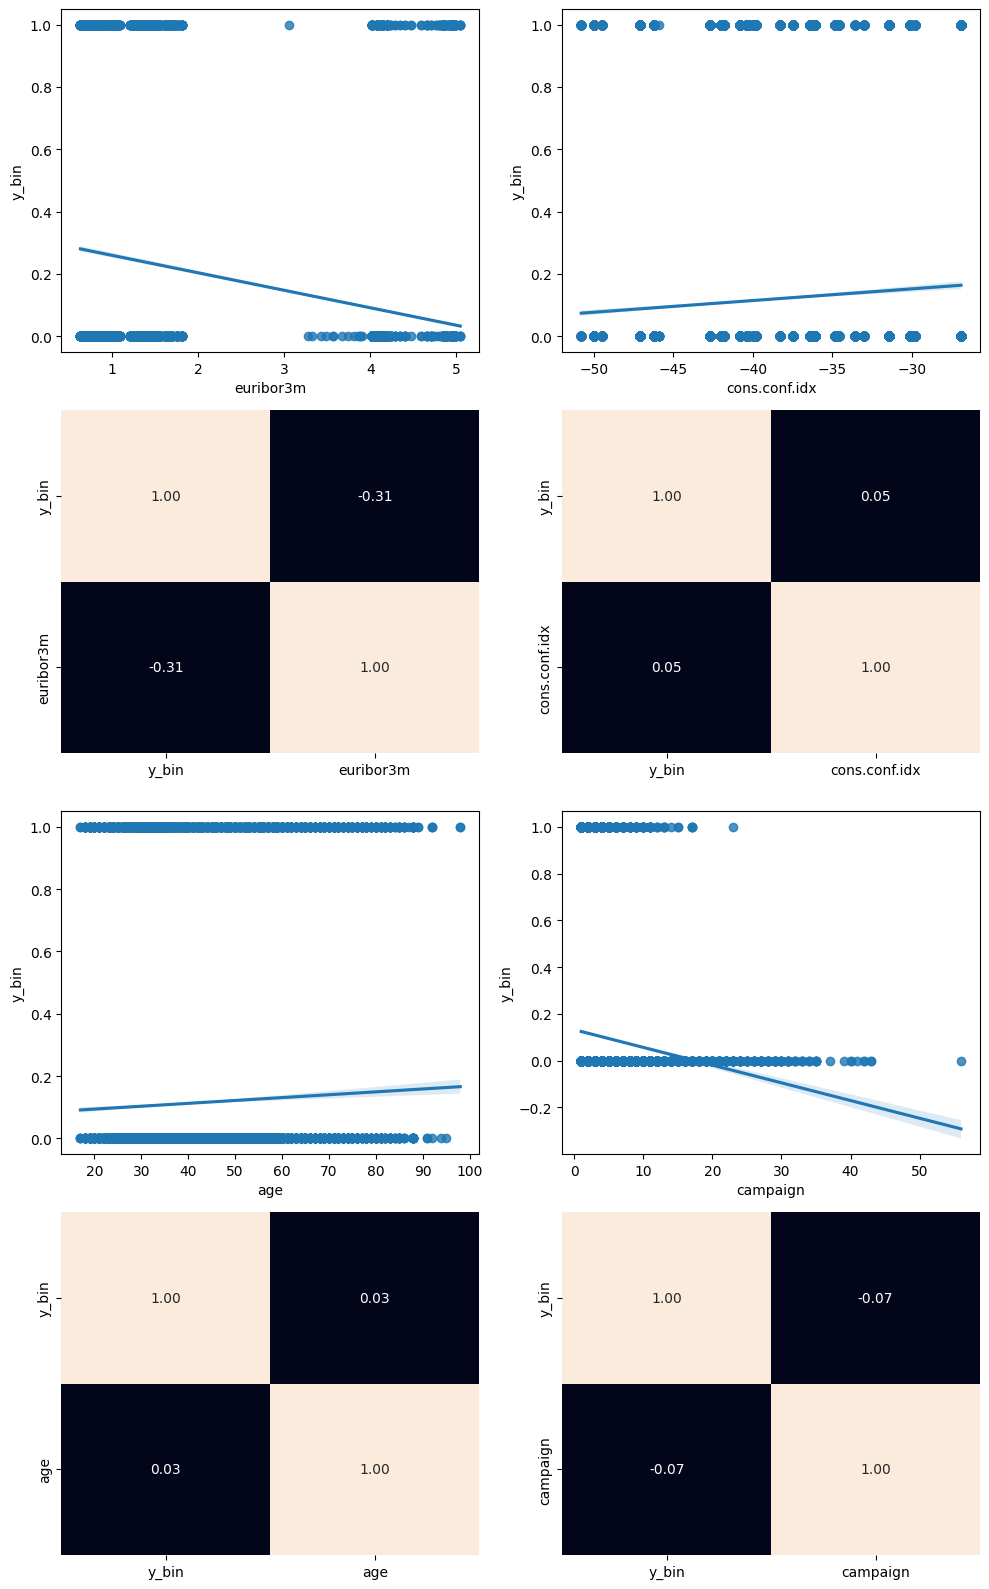

In [66]:
df["y_bin"] = df["y"].map({"no": 0, "yes": 1})

fig, axis = plt.subplots(4, 2, figsize = (10, 16))

sns.regplot(ax = axis[0, 0], data = df, x = "euribor3m", y = "y_bin")
sns.heatmap(df[["y_bin", "euribor3m"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = df, x = "cons.conf.idx", y = "y_bin")
sns.heatmap(df[["y_bin", "cons.conf.idx"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False)

sns.regplot(ax = axis[2, 0], data = df, x = "age", y = "y_bin")
sns.heatmap(df[["y_bin", "age"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0], cbar = False)

sns.regplot(ax = axis[2, 1], data = df, x = "campaign", y = "y_bin")
sns.heatmap(df[["y_bin", "campaign"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1], cbar = False)

plt.tight_layout()
plt.show()


Existe una fuerte relación entre el Tipo de Interés del Euroibor a 3 meses con la probabilidad de que un cliente contrate un depósito a largo plazo. Es decir, a mayor Euribor, mayor probabilidad de que el cliente diga “YES”.

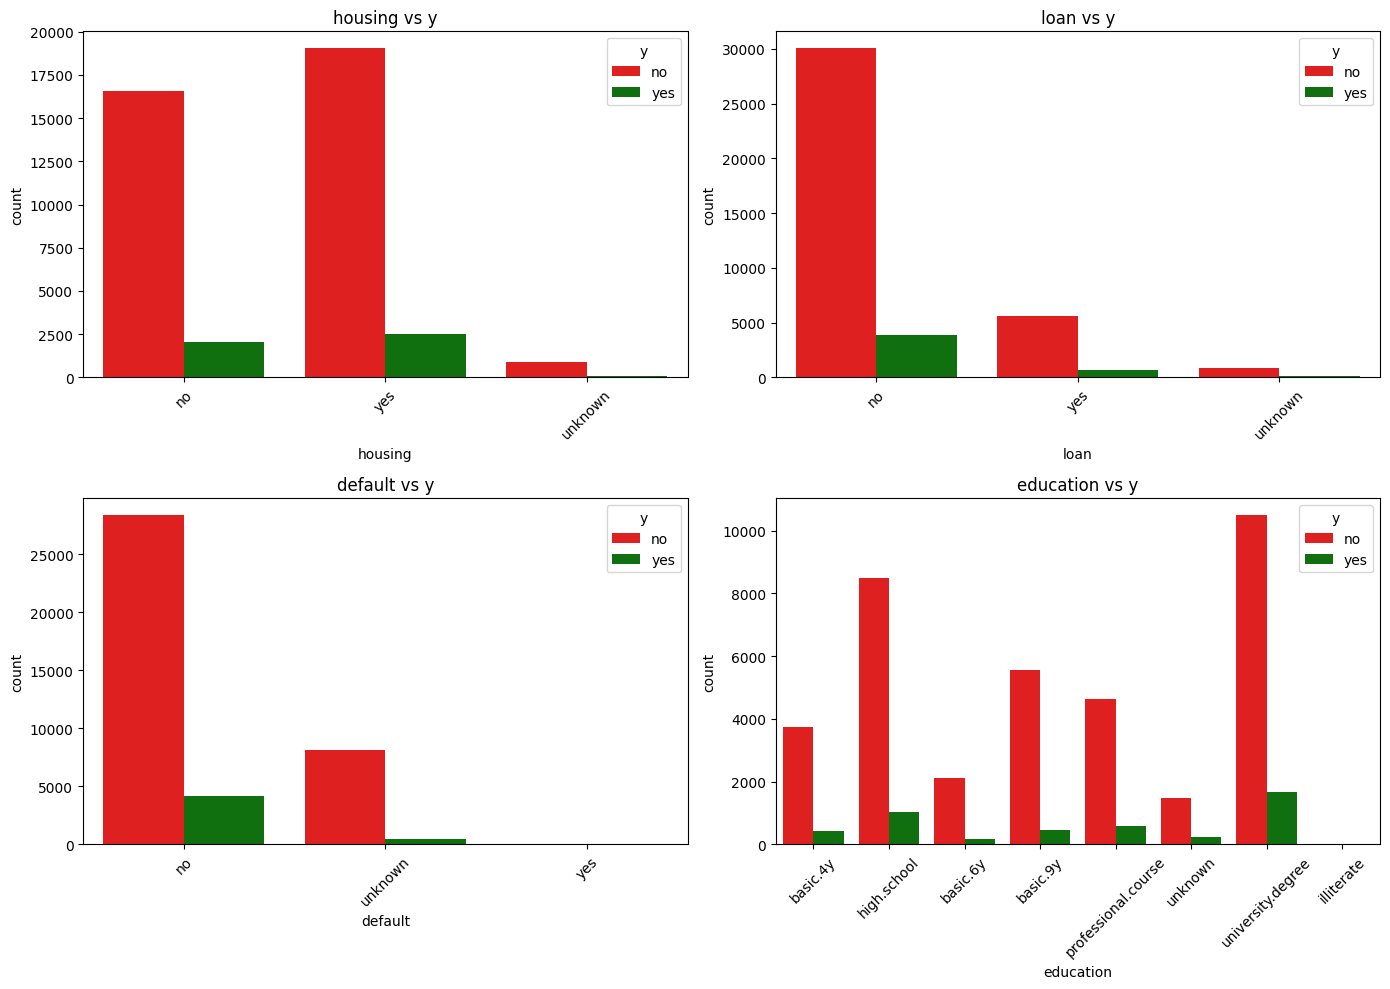

In [67]:
categoricas = ["housing", "loan", "default", "education"]

fig, axis = plt.subplots(2, 2, figsize=(14, 10))

for i, col in enumerate(categoricas):
    fila = i // 2
    colum = i % 2
    sns.countplot(
        data=df,
        x=col,
        hue="y",
        ax=axis[fila, colum],
        palette={"no": "red", "yes": "green"}   # Colores personalizados
    )
    axis[fila, colum].set_title(f"{col} vs y")
    axis[fila, colum].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()



Housing: No existe mucha diferencia de los clientes que tienen hipoteca como los que no, en el momento de contratar la campaña.
Loan : Los clientes con préstamo personal tienen menos capacidad de ahorro, por lo que es lógico que rechacen un depósito.
Default: Es notable que los clientes sin impagos, van contestar positivamente al depósito a largo plazo.
Education: En esta variable los clientes que se puede considerar con mayor respuesta son los que tienen un nivel High.school y University.degree.

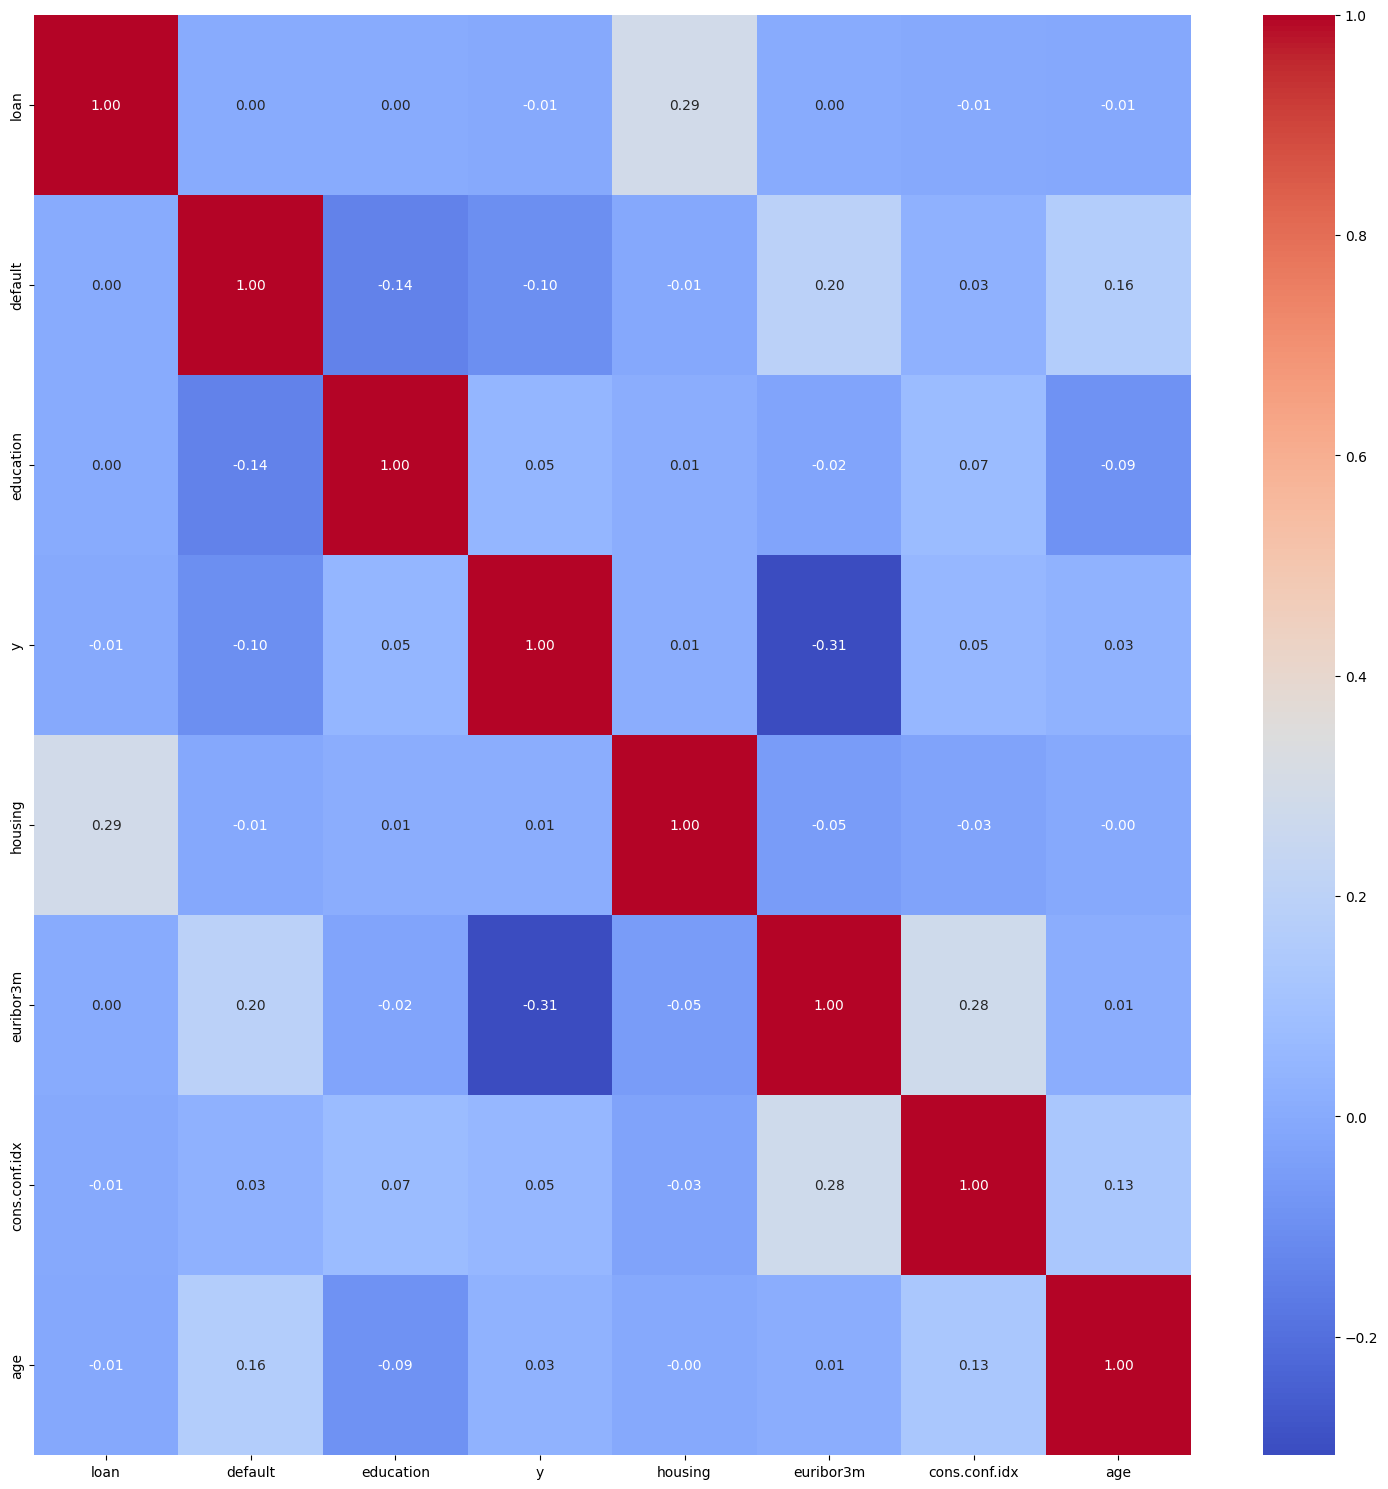

In [68]:
df_corr = df.copy()

# Convertir variables categóricas a números
for col in ["loan", "default", "education", "y", "housing"]:
    df_corr[col] = pd.factorize(df_corr[col])[0]

# Dibujar el plot
plt.figure(figsize=(15, 15))
sns.heatmap(
    df_corr[["loan", "default", "education", "y", "housing",
             "euribor3m", "cons.conf.idx", "age"]].corr(),
    annot=True, fmt=".2f", cmap="coolwarm"
)
plt.tight_layout()
plt.show()


Análisis de toda la data en una sola

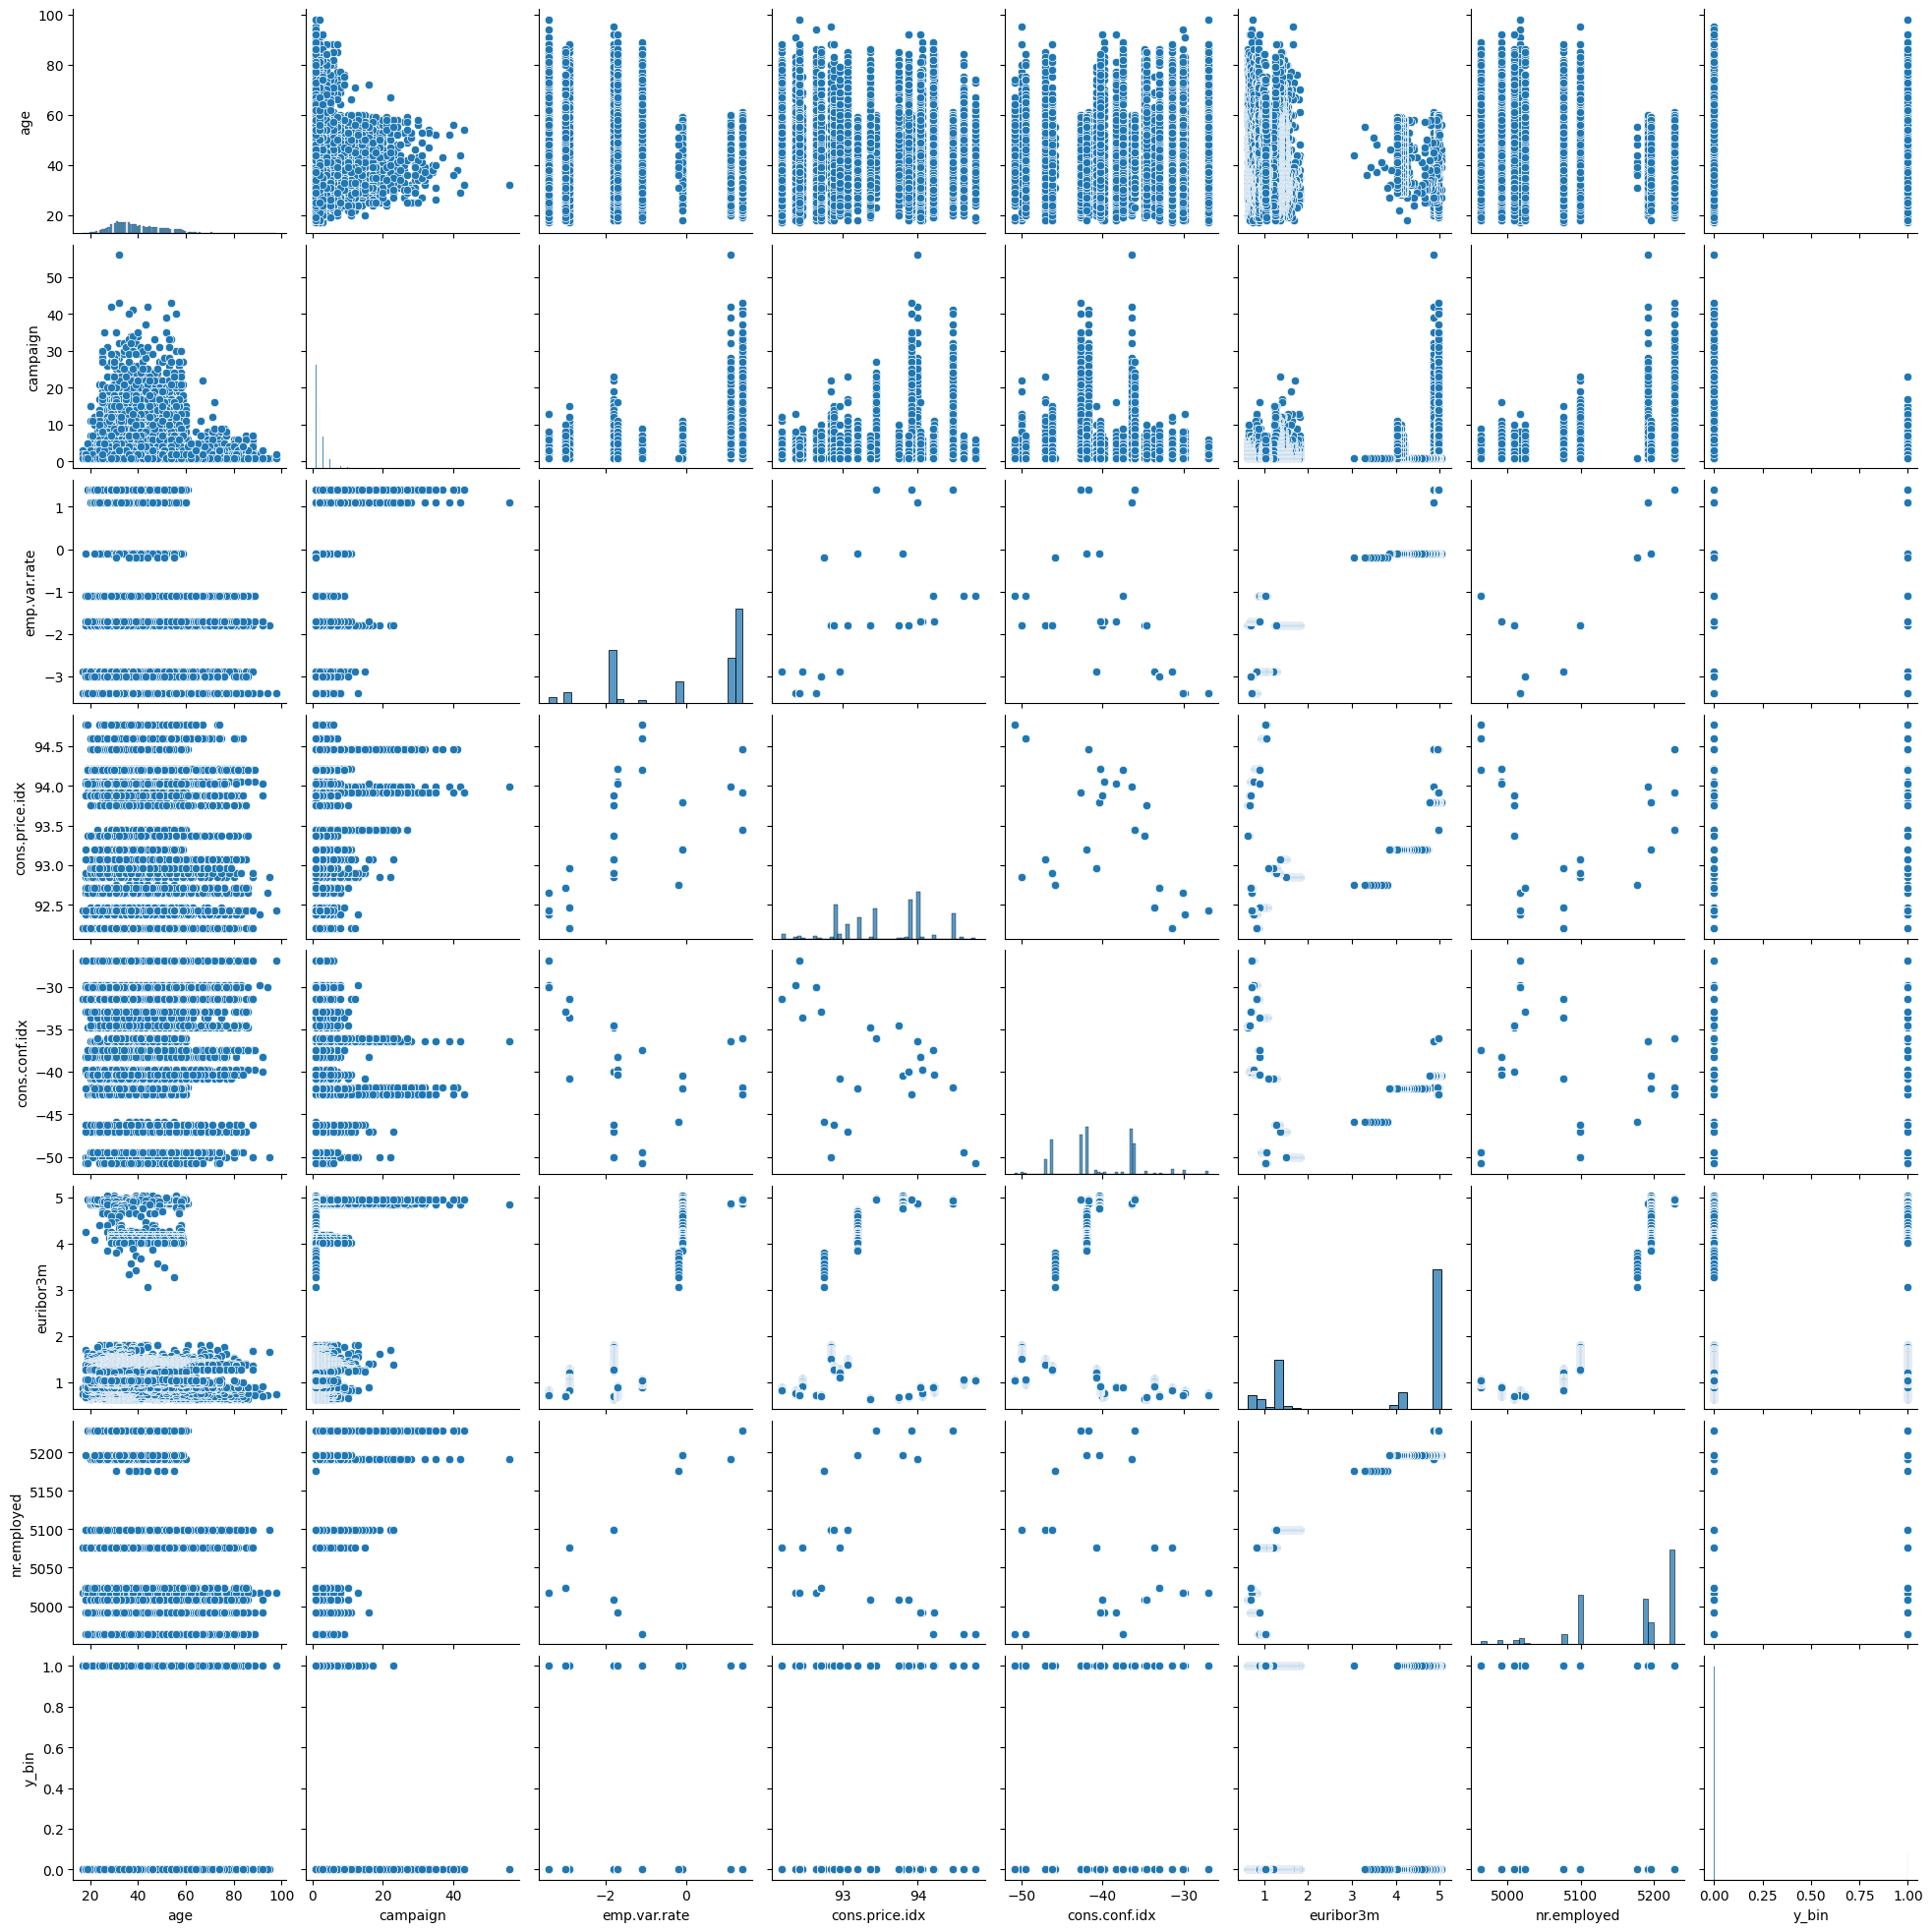

In [69]:
sns.pairplot(data = df)

In [70]:
##Paso 5: Ingeniería de características##
df.describe()

,age,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y_bin
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,2.770014,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,1.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,1.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,2.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,3.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,56.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


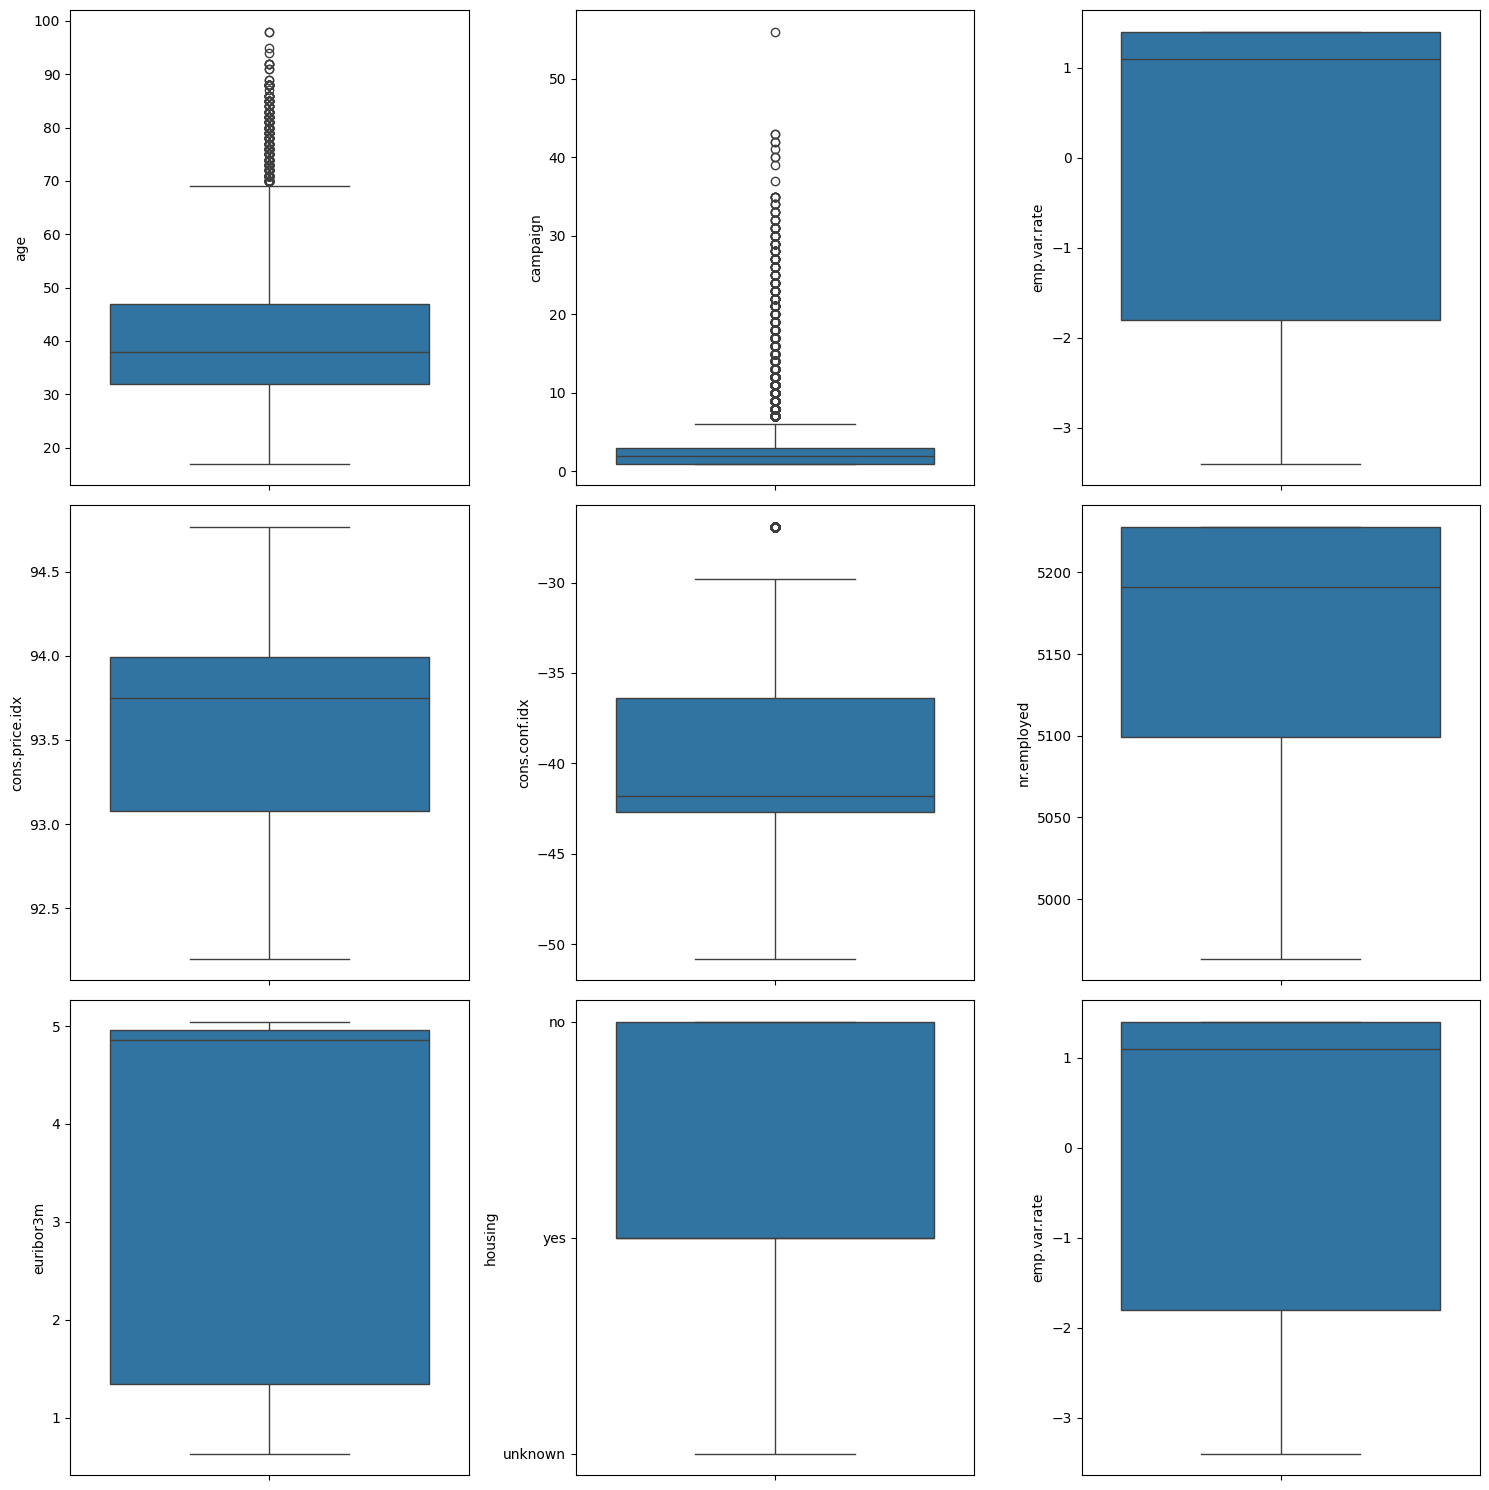

In [71]:
fig, axes = plt.subplots(3, 3, figsize = (15, 15))

sns.boxplot(ax = axes[0, 0], data = df, y = "age")
sns.boxplot(ax = axes[0, 1], data = df, y = "campaign")
sns.boxplot(ax = axes[0, 2], data = df, y = "emp.var.rate")
sns.boxplot(ax = axes[1, 0], data = df, y = "cons.price.idx")
sns.boxplot(ax = axes[1, 1], data = df, y = "cons.conf.idx")
sns.boxplot(ax = axes[1, 2], data = df, y = "nr.employed")
sns.boxplot(ax = axes[2, 0], data = df, y = "euribor3m")
sns.boxplot(ax = axes[2, 1], data = df, y = "housing")
sns.boxplot(ax = axes[2, 2], data = df, y = "emp.var.rate")

plt.tight_layout()

plt.show()

In [72]:
# Stats for YES, I WANT!
responds_stats = df["y_bin"].describe()
responds_stats

count    41188.000000
mean         0.112654
std          0.316173
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: y_bin, dtype: float64

In [73]:
# IQR para YES, I WANT!

responds_iqr = responds_stats["75%"] - responds_stats["25%"]
upper_limit = responds_stats["75%"] + 1.5 * responds_iqr
lower_limit = responds_stats["25%"] - 1.5 * responds_stats

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(responds_iqr, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 0.0 y count   -61782.00
mean        -0.17
std         -0.47
min          0.00
25%          0.00
50%          0.00
75%          0.00
max         -1.50
Name: y_bin, dtype: float64, con un rango intercuartílico de 0.0


Limpieza de outliers

In [74]:
df[df["campaign"] < 10]

,age,job,marital,education,default,housing,loan,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,y_bin
0,56,housemaid,married,basic.4y,no,no,no,1,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,1,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,1,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,basic.6y,no,no,no,1,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,1,1.1,93.994,-36.4,4.857,5191.0,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,1,-1.1,94.767,-50.8,1.028,4963.6,yes,1
41184,46,blue-collar,married,professional.course,no,no,no,1,-1.1,94.767,-50.8,1.028,4963.6,no,0
41185,56,retired,married,university.degree,no,yes,no,2,-1.1,94.767,-50.8,1.028,4963.6,no,0
41186,44,technician,married,professional.course,no,no,no,1,-1.1,94.767,-50.8,1.028,4963.6,yes,1


Existen demasiadas llamadas de contacto po campaña y para hacer más concisos con la limpieza de outliers se tomarán los valores de menos de 10 contactos. Además se evidenció que existe una relación inversa mientras más llamadas, más se rehusaban a contratar el servicio.

In [75]:
from numpy._core.defchararray import upper
# TENEMOS QUE GUARDARNOS TODOS LOS DATASETS, ES DECIR:

total_data_CON_outliers = df.copy()
total_data_SIN_outliers = df.copy() # Lo vamos a modificar. Para cada variable con outliers, reemplazamos sus valores outliers

outliers_cols = ["age", "cons.conf.idx", "euribor3m", "emp.var.rate", "nr.employed"]

def replace_outliers(column, df):
  col_stats = df[column].describe()
  col_iqr = col_stats["75%"] - col_stats["25%"]
  upper_limit = round(float(col_stats["75%"] + 1.5 * col_iqr), 2)
  lower_limit = round(float(col_stats["25%"] - 1.5 * col_iqr), 2)

  if lower_limit < 0: lower_limit = min(df[column])
  # Vamos a quitar los outliers superiores
  df[column] = df[column].apply(lambda x: x if (x <= upper_limit) else upper_limit)
  # Vamos a quitar los outliers inferiores
  df[column] = df[column].apply(lambda x: x if (x >= lower_limit) else lower_limit)
  return df.copy(), [lower_limit, upper_limit]

outliers_dict = {}
for column in outliers_cols:
  total_data_SIN_outliers, limits = replace_outliers(column, total_data_SIN_outliers)
  outliers_dict.update({column: limits})

outliers_dict # Este JSON me lo tengo que GUARDAR

{'age': [9.5, 69.5],
 'cons.conf.idx': [-50.8, -26.95],
 'euribor3m': [0.634, 10.39],
 'emp.var.rate': [-3.4, 6.2],
 'nr.employed': [4905.6, 5421.6]}

In [76]:
with open("./outliers_dict.json", "w") as f:
  json.dump(outliers_dict, f)

In [77]:
total_data_CON_outliers.isnull().sum().sort_values(ascending=False)

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
campaign          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
y_bin             0
dtype: int64

In [78]:
total_data_SIN_outliers.isnull().sum().sort_values(ascending=False)

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
campaign          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
y_bin             0
dtype: int64

In [79]:
total_data_CON_outliers["y_bin"] = df["y_bin"].fillna(df["y_bin"].median()) # Cuando una variable es entera pero numérica/incontable
total_data_CON_outliers["euribor3m"] = df["euribor3m"].fillna(df["euribor3m"].median())
total_data_CON_outliers["cons.conf.idx"]= total_data_CON_outliers["cons.conf.idx"].fillna(df["cons.conf.idx"].median())
total_data_CON_outliers.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
campaign          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
y_bin             0
dtype: int64

In [80]:
total_data_CON_outliers["Best_called"] = total_data_CON_outliers["euribor3m"] + total_data_CON_outliers["emp.var.rate"]
total_data_SIN_outliers["Best_called"] = total_data_SIN_outliers["euribor3m"] + total_data_SIN_outliers["emp.var.rate"]

total_data_SIN_outliers.head()

,age,job,marital,education,default,housing,loan,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,y_bin,Best_called
0,56.0,housemaid,married,basic.4y,no,no,no,1,1.1,93.994,-36.4,4.857,5191.0,no,0,5.957
1,57.0,services,married,high.school,unknown,no,no,1,1.1,93.994,-36.4,4.857,5191.0,no,0,5.957
2,37.0,services,married,high.school,no,yes,no,1,1.1,93.994,-36.4,4.857,5191.0,no,0,5.957
3,40.0,admin.,married,basic.6y,no,no,no,1,1.1,93.994,-36.4,4.857,5191.0,no,0,5.957
4,56.0,services,married,high.school,no,no,yes,1,1.1,93.994,-36.4,4.857,5191.0,no,0,5.957


In [81]:
from sklearn.model_selection import train_test_split

# total_data_SIN_outliers
# total_data_CON_outliers

predictoras = ["age", "cons.conf.idx", "euribor3m", "emp.var.rate", "nr.employed"]
target = "y_bin"

X_CON = total_data_CON_outliers.drop(target, axis = 1)[predictoras]
X_SIN = total_data_SIN_outliers.drop(target, axis = 1)[predictoras]
y = total_data_CON_outliers[target]

X_train_CON_outliers, X_test_CON_outliers, y_train, y_test = train_test_split(X_CON, y, test_size = 0.2, random_state = 10)
X_train_SIN_outliers, X_test_SIN_outliers = train_test_split(X_SIN, test_size = 0.2, random_state = 10)


In [82]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# X_train_CON_outliers
# X_train_SIN_outliers

# X_test_CON_outliers
# X_test_SIN_outliers

# TENGO QUE GUARDARME TRES SITUACIONES: 1) DATASET SIN TOCAR, 2) DATASET NORMALIZADO, 3) DATASET MIN-MAX

## NORMALIZACIÓN
### CON OUTLIERS
norm_CON_outliers = StandardScaler()
norm_CON_outliers.fit(X_train_CON_outliers)

X_train_CON_outliers_norm = norm_CON_outliers.transform(X_train_CON_outliers)
X_train_CON_outliers_norm = pd.DataFrame(X_train_CON_outliers_norm, index = X_train_CON_outliers.index, columns = predictoras)

X_test_CON_outliers_norm = norm_CON_outliers.transform(X_test_CON_outliers)
X_test_CON_outliers_norm = pd.DataFrame(X_test_CON_outliers_norm, index = X_test_CON_outliers.index, columns = predictoras)

### SIN OUTLIERS
norm_SIN_outliers = StandardScaler()
norm_SIN_outliers.fit(X_train_SIN_outliers)

X_train_SIN_outliers_norm = norm_SIN_outliers.transform(X_train_SIN_outliers)
X_train_SIN_outliers_norm = pd.DataFrame(X_train_SIN_outliers_norm, index = X_train_SIN_outliers.index, columns = predictoras)

X_test_SIN_outliers_norm = norm_SIN_outliers.transform(X_test_SIN_outliers)
X_test_SIN_outliers_norm = pd.DataFrame(X_test_SIN_outliers_norm, index = X_test_SIN_outliers.index, columns = predictoras)


## ESCALADO MIN-MAX (MINMAXIMIZACIÓN)
### CON OUTLIERS
scaler_CON_outliers = MinMaxScaler()
scaler_CON_outliers.fit(X_train_CON_outliers)

X_train_CON_outliers_scal = scaler_CON_outliers.transform(X_train_CON_outliers)
X_train_CON_outliers_scal = pd.DataFrame(X_train_CON_outliers_scal, index = X_train_CON_outliers.index, columns = predictoras)

X_test_CON_outliers_scal = scaler_CON_outliers.transform(X_test_CON_outliers)
X_test_CON_outliers_scal = pd.DataFrame(X_test_CON_outliers_scal, index = X_test_CON_outliers.index, columns = predictoras)

### SIN OUTLIERS
scaler_SIN_outliers = MinMaxScaler()
scaler_SIN_outliers.fit(X_train_SIN_outliers)

X_train_SIN_outliers_scal = scaler_SIN_outliers.transform(X_train_SIN_outliers)
X_train_SIN_outliers_scal = pd.DataFrame(X_train_SIN_outliers_scal, index = X_train_SIN_outliers.index, columns = predictoras)

X_test_SIN_outliers_scal = scaler_SIN_outliers.transform(X_test_SIN_outliers)
X_test_SIN_outliers_scal = pd.DataFrame(X_test_SIN_outliers_scal, index = X_test_SIN_outliers.index, columns = predictoras)

# X_train_CON_outliers
# X_train_CON_outliers_norm
# X_train_CON_outliers_scal
# X_train_SIN_outliers
# X_train_SIN_outliers_norm
# X_train_SIN_outliers_scal

# X_test_CON_outliers
# X_test_CON_outliers_norm
# X_test_CON_outliers_scal
# X_test_SIN_outliers
# X_test_SIN_outliers_norm
# X_test_SIN_outliers_scal

In [83]:
import os
os.getcwd()


'/workspaces/PrimerMLProyectodeRegresi-nLog-stica_Cafedemanha94/data/processed'

In [84]:
import pandas as pd

X_train_CON_outliers = pd.read_excel("X_train_CON_outliers.xlsx")
X_train_CON_outliers_norm = pd.read_excel("X_train_CON_outliers_norm.xlsx")
X_train_CON_outliers_scal = pd.read_excel("X_train_CON_outliers_scal.xlsx")

X_train_SIN_outliers = pd.read_excel("X_train_SIN_outliers.xlsx")
X_train_SIN_outliers_norm = pd.read_excel("X_train_SIN_outliers_norm.xlsx")
X_train_SIN_outliers_scal = pd.read_excel("X_train_SIN_outliers_scal.xlsx")

y_train = pd.read_excel("y_train.xlsx")

FileNotFoundError: [Errno 2] No such file or directory: 'X_train_CON_outliers.xlsx'

In [ ]:
import pandas as pd

X_train_CON_outliers = pd.read_excel("data/processed/X_train_CON_outliers.xlsx")
X_train_CON_outliers_norm = pd.read_excel("data/processed/X_train_CON_outliers_norm.xlsx")
X_train_CON_outliers_scal = pd.read_excel("data/processed/X_train_CON_outliers_scal.xlsx")
X_train_SIN_outliers = pd.read_excel("data/processed/X_train_SIN_outliers.xlsx")
X_train_SIN_outliers_norm = pd.read_excel("data/processed/X_train_SIN_outliers_norm.xlsx")
X_train_SIN_outliers_scal = pd.read_excel("data/processed/X_train_SIN_outliers_scal.xlsx")
y_train = pd.read_excel("data/processed/y_train.xlsx")


FileNotFoundError: [Errno 2] No such file or directory: 'data/processed/X_train_CON_outliers.xlsx'

In [58]:
import os

for root, dirs, files in os.walk("..", topdown=True):
    for f in files:
        if f.endswith(".xlsx"):
            print(os.path.join(root, f))
